In [2]:
import pandas as pd
from sklearn.datasets import load_wine, load_breast_cancer

wine1 = load_wine()
i = wine1.feature_names
wine_Y = wine1.target
wine = pd.DataFrame(data=wine1.data, columns=wine1.feature_names)

breast_cancer = load_breast_cancer()
b = breast_cancer.feature_names
breast_cancer_Y = breast_cancer.target
breast_cancer = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

ionosphere=pd.read_csv('https://raw.githubusercontent.com/hargurjeet/MachineLearning/Ionosphere/ionosphere_data.csv')
ionosphere.rename(columns={'column_ai':'target'}, inplace=True)
# print(ionosphere)

wine_X = wine[i]
breast_cancer_X = breast_cancer[b]
ionosphere_X = ionosphere.drop(['target'], axis=1)
ionosphere_Y = ionosphere.target

### hyperparameter tuning for Wine Dataset

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from itertools import product
import numpy as np

state_range_values = [3]
algorithm_values = ['viterbi', 'map']  # Choose the appropriate algorithm
random_state_values = [None]  # Set to None or an integer value for reproducibility
n_iter_values = [100, 200, 300, 500, 1000]  # Adjust the number of iterations as needed
tol_values = [1e-3, 1e-4, 1e-5, 1e-6]  # Tolerance threshold for convergence
covariance_type_values = ['full', 'diag', 'spherical']  # Adjust covariance types
test_size_values = [0.1,0.2,0.3,0.4]



best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
param_names = ['n_components','implementation','algorithm','random_state','n_iter','tol']
best_pred_y = 0
best_test_y = 0

for num_of_states,algo_type,random_state,n_iter,covariance_type,tol,test_size in product(state_range_values,algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values):


    # model = CustomHMM(num_of_states,implement_type,algo_type,random_state,n_iter,tol)
    # X=1
    # test_y,pred_y, score = model.fit(X,lengths=test_size)
    train_X, test_X, train_y, test_y = train_test_split(wine_X,wine_Y,random_state=42,test_size=test_size)
    model = GaussianHMM(n_components=num_of_states,algorithm=algo_type,random_state=random_state,n_iter=n_iter, covariance_type=covariance_type, tol=tol)
    model.fit(wine_X)
    pred_y = model.predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [num_of_states,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

Best Parameter Values: 

[3, 'map', None, 200, 'full', 1e-06]


Best Ratio:0.3


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      0.95      0.98        21
           2       0.82      1.00      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.95        54

Confusion Matrix: 

[[17  0  2]
 [ 0 20  1]
 [ 0  0 14]]




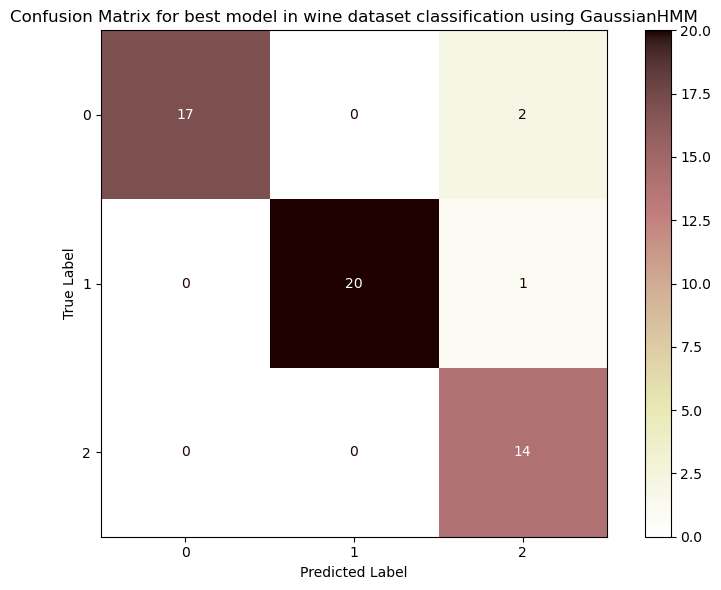

In [10]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in wine dataset classification using GaussianHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

### hyperparameter tuning for Breast Cancer Dataset

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from itertools import product

state_range_values = [2]
algorithm_values = ['viterbi']  # Choose the appropriate algorithm
random_state_values = [None]  # Set to None or an integer value for reproducibility
n_iter_values = [250, 300, 500, 750]  # Adjust the number of iterations as needed
tol_values = [1e-4, 1e-5, 1e-6, 1e-7]  # Tolerance threshold for convergence
covariance_type_values = ['full', 'diag', 'spherical']  # Adjust covariance types
test_size_values = [0.1,0.2,0.3,0.4]



best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
param_names = ['n_components','implementation','algorithm','random_state','n_iter','tol']
best_pred_y = 0
best_test_y = 0

for num_of_states,algo_type,random_state,n_iter,covariance_type,tol,test_size in product(state_range_values,algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values):


    # model = CustomHMM(num_of_states,implement_type,algo_type,random_state,n_iter,tol)
    # X=1
    # test_y,pred_y, score = model.fit(X,lengths=test_size)
    train_X, test_X, train_y, test_y = train_test_split(breast_cancer_X,breast_cancer_Y,random_state=42,test_size=test_size)
    model = GaussianHMM(n_components=num_of_states,algorithm=algo_type,random_state=random_state,n_iter=n_iter, covariance_type=covariance_type, tol=tol,verbose=True)
    model.fit(breast_cancer_X)
    pred_y = model.predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [num_of_states,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

Best Parameter Values: 

[2, 'viterbi', None, 250, 'spherical', 1e-06]


Best Ratio:0.1


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.97      0.97      0.97        40

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

Confusion Matrix: 

[[16  1]
 [ 1 39]]




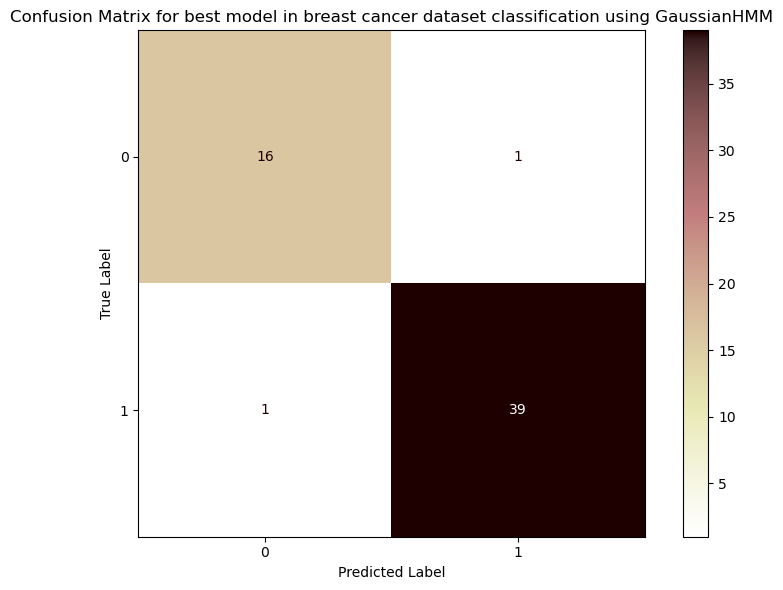

In [12]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in breast cancer dataset classification using GaussianHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

## Hyperparameter tuning for Ionosphere dataset

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
from itertools import product

state_range_values = [2]
algorithm_values = ['viterbi']  # Choose the appropriate algorithm
random_state_values = [None]  # Set to None or an integer value for reproducibility
n_iter_values = [250, 300, 500, 750]  # Adjust the number of iterations as needed
tol_values = [1e-4, 1e-5, 1e-6, 1e-7]  # Tolerance threshold for convergence
covariance_type_values = ['full', 'diag', 'spherical']  # Adjust covariance types
test_size_values = [0.1,0.2,0.3,0.4]



best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
param_names = ['n_components','implementation','algorithm','random_state','n_iter','tol']
best_pred_y = 0
best_test_y = 0

ionosphere_Y_changed = []
for y in ionosphere_Y:
    if y == 'b':
        ionosphere_Y_changed.append(0)
    else:
        ionosphere_Y_changed.append(1)

for num_of_states,algo_type,random_state,n_iter,covariance_type,tol,test_size in product(state_range_values,algorithm_values, random_state_values, n_iter_values, covariance_type_values,tol_values,test_size_values):


    # model = CustomHMM(num_of_states,implement_type,algo_type,random_state,n_iter,tol)
    # X=1
    # test_y,pred_y, score = model.fit(X,lengths=test_size)
    train_X, test_X, train_y, test_y = train_test_split(ionosphere_X,ionosphere_Y_changed,random_state=42,test_size=test_size)
    model = GaussianHMM(n_components=num_of_states,algorithm=algo_type,random_state=random_state,n_iter=n_iter, covariance_type=covariance_type, tol=tol)
    model.fit(ionosphere_X)

    pred_y = model.predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = test_size
        best_model = model
        best_param_list = [num_of_states,algo_type,random_state,n_iter,covariance_type,tol]
        best_pred_y = pred_y
        best_test_y = test_y

Best Parameter Values: 

[2, 'viterbi', None, 750, 'full', 0.0001]


Best Ratio:0.3


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        39
           1       0.93      1.00      0.96        67

    accuracy                           0.95       106
   macro avg       0.97      0.94      0.95       106
weighted avg       0.96      0.95      0.95       106

Confusion Matrix: 

[[34  5]
 [ 0 67]]




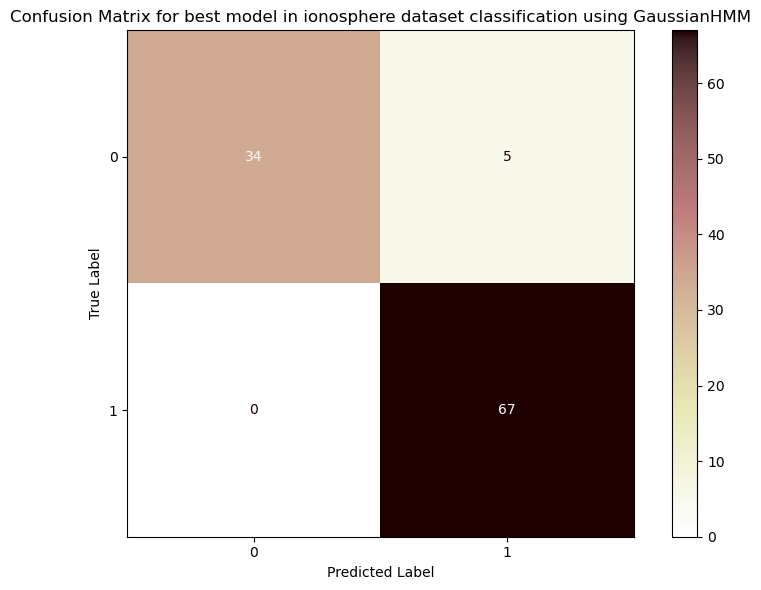

In [16]:
cm = confusion_matrix(best_test_y, best_pred_y)
print("Best Parameter Values: \n")
print(best_param_list)
print("\n")
print("Best Ratio:" + str(best_train_test_ratio))
print("\n")
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in ionosphere dataset classification using GaussianHMM')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()